#### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/sahilkakkar/Downloads/Lead-Scoring-Case-Study/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Dropping Useless Columns (Reasons Mentioned)

In [6]:
print(df.shape)
print(len(df['Prospect ID'].unique()))
print(len(df['Lead Number'].unique()))
# The 'Prospect ID' and 'Lead Number' column are nothing but identifiers for rows, they do not add any information that could be used for analysis
# This shows that there are no duplicate Prospect ID or Lead Number

(9240, 37)
9240
9240


In [7]:
# We can drop the Prospect ID and Lead Number columns because they are merely identifiers and don't have any significant information for prediction
df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [8]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Tackling Missing Values

In [9]:
(df.isnull().sum()/len(df))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Our dataset not only has missing values such as NaN but it also has many values by the "Select" keyword which means the user didn't fill these values. These values should also count as missing values and therefore we will replace them with NaN. But before that, we would make all the strings lowercase so that we don't miss other variations of "Select" if any present.

In [10]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [11]:
df.replace('select', np.nan, inplace = True)

In [12]:
(df.isnull().sum()/len(df))  *100
# This is a more correct representation of the missing values in our dataset.

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Column: 'Lead Source' 

In [13]:
print(df['Lead Source'].value_counts(normalize = True, dropna = False) * 100)
# Only 0.38% of the values in this column are missing
# We can drop these values as they won't have any effect on our analysis as we have approximately 99.6% of the values.

google               31.093074
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
welingak website      1.536797
referral sites        1.352814
facebook              0.595238
NaN                   0.389610
bing                  0.064935
click2call            0.043290
press_release         0.021645
social media          0.021645
live chat             0.021645
youtubechannel        0.010823
testone               0.010823
pay per click ads     0.010823
welearnblog_home      0.010823
welearn               0.010823
blog                  0.010823
nc_edm                0.010823
Name: Lead Source, dtype: float64


In [14]:
df = df[df['Lead Source'].notna()]

Column: 'TotalVisits'

In [15]:
df['TotalVisits'].value_counts(normalize = True, dropna = False).sort_index() * 100
# This column is similar to the "Lead Source" column
# We can simply drop the rows which contain null values (which are less than 2%)

0.0      23.478922
1.0       4.291612
2.0      18.242069
3.0      14.189483
4.0      12.168622
5.0       8.507171
6.0       5.063016
7.0       3.357236
8.0       2.433724
9.0       1.781834
10.0      1.238592
11.0      0.934376
12.0      0.488918
13.0      0.521512
14.0      0.391134
15.0      0.195567
16.0      0.228162
17.0      0.173837
18.0      0.162973
19.0      0.097784
20.0      0.130378
21.0      0.065189
22.0      0.032595
23.0      0.065189
24.0      0.054324
25.0      0.054324
26.0      0.021730
27.0      0.054324
28.0      0.021730
29.0      0.021730
30.0      0.010865
32.0      0.010865
41.0      0.010865
42.0      0.010865
43.0      0.010865
54.0      0.010865
55.0      0.010865
74.0      0.010865
115.0     0.010865
141.0     0.010865
251.0     0.010865
NaN       1.412429
Name: TotalVisits, dtype: float64

In [16]:
df = df[df['TotalVisits'].notna()]

Column: 'Country' 

In [17]:
df.Country.value_counts(normalize = True, dropna = False) * 100
# 70% of the people are from Country "India" and the rest of the countries are below 1%
# 26.63% of the values are missing while "unknown" is 0.054% of the values
# This column doesn't have the necessary variance needed to be conducive to our analysis and predictions since most of the values are from one category "India"
# It would be wise to drop this column

india                   71.534053
NaN                     25.303064
united states            0.760414
united arab emirates     0.584086
singapore                0.264492
saudi arabia             0.231430
united kingdom           0.165307
australia                0.143266
qatar                    0.110205
bahrain                  0.077143
hong kong                0.077143
oman                     0.066123
france                   0.066123
unknown                  0.055102
kuwait                   0.044082
south africa             0.044082
canada                   0.044082
nigeria                  0.044082
germany                  0.044082
sweden                   0.033061
philippines              0.022041
uganda                   0.022041
italy                    0.022041
bangladesh               0.022041
netherlands              0.022041
asia/pacific region      0.022041
china                    0.022041
belgium                  0.022041
ghana                    0.022041
kenya         

In [18]:
df.drop('Country', axis=1, inplace = True)

Column: 'Specialization' 

In [19]:
df['Specialization'].value_counts(normalize = True, dropna = False) * 100
# 36% of the values in this column are not provided
# But these values aren't actually missing, they do have information hidden in them 
# There might be the case that the students didn't find the Specialization they were looking for,
# or they were just not sure at the moment to make a decision and decided to not make a decision
# So it would be wise to take these missing values as "Unstated", that would be a more correct representation

NaN                                  36.169275
finance management                   10.568658
human resource management             9.224157
marketing management                  9.069870
operations management                 5.499229
business administration               4.397179
it projects management                4.033502
supply chain management               3.813092
banking, investment and insurance     3.691867
travel and tourism                    2.226141
media and advertising                 2.226141
international business                1.939608
healthcare management                 1.719198
e-commerce                            1.223275
hospitality management                1.223275
retail management                     1.102050
rural and agribusiness                0.804496
e-business                            0.628168
services excellence                   0.440820
Name: Specialization, dtype: float64

In [20]:
df['Specialization'].replace(np.nan, "unstated", inplace = True )

Column: 'How did you hear about X Education'

In [21]:
df['How did you hear about X Education'].value_counts(normalize = True, dropna = False) * 100
# 78% of the values in this column are missing
# This column has no useful information for us to get insights from
# We should drop this column

NaN                      78.091250
online search             8.904562
word of mouth             3.824113
student of someschool     3.416354
other                     2.049813
multiple sources          1.675116
advertisements            0.771435
social media              0.727353
email                     0.286533
sms                       0.253471
Name: How did you hear about X Education, dtype: float64

In [22]:
df.drop('How did you hear about X Education', axis = 1, inplace = True)

Column: 'What is your current occupation'

In [23]:
df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100
# We should impute 'Unemployed' in the case of missing values in this case

unemployed              60.348248
NaN                     29.567996
working professional     7.460877
student                  2.270223
other                    0.165307
housewife                0.099184
businessman              0.088164
Name: What is your current occupation, dtype: float64

In [24]:
df['What is your current occupation'].replace(np.nan, "unemployed", inplace = True)

Column: 'What matters most to you in choosing a course'

In [25]:
df['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100
# 70% of the values say "better career prospects" while approximately 30% of the values are missing
# This column doesn't have the necessary variance to be conducive to our analysis and making predictions
# It would be wise to drop this column

better career prospects      70.200573
NaN                          29.777386
flexibility & convenience     0.011020
other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64

In [26]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

Column: 'Tags'

In [27]:
df['Tags'].value_counts(normalize = True, dropna = False) * 100
# 36% of the values in this column are missing
# Also, except the categories like "will revert after reading the email" and "ringing", all the other categories don't even represent more than 6% individually and they seem really erratic as well (for eg, 'invalid number' and 'wrong number given' are not that different from each other)
# This column doesn't seem to be helpful in our analysis. So it would be in our best interests to drop it.

NaN                                                  36.665197
will revert after reading the email                  22.217324
ringing                                              13.081331
interested in other courses                           5.609434
already a student                                     5.124532
closed by horizzon                                    3.317170
switched off                                          2.644920
busy                                                  2.038792
lost to eins                                          1.895526
not doing further education                           1.597972
interested  in full time mba                          1.278378
graduation in progress                                1.223275
invalid number                                        0.914701
diploma holder (not eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0

In [28]:
df.drop('Tags', axis=1, inplace = True)

Column: "Lead Quality"

In [29]:
df['Lead Quality'].value_counts(normalize = True, dropna = False) * 100
# 52% of the values in this column are missing
# While categories like "might be", "not sure" don't seem too different from each other, others don't represent more than 7% individually
# It would be wise to drop this column

NaN                  52.016751
might be             16.740137
not sure             11.968261
worst                 6.623319
high in relevance     6.524135
low in relevance      6.127397
Name: Lead Quality, dtype: float64

In [30]:
df.drop('Lead Quality', axis = 1, inplace = True)

Column: 'Lead Profile'

In [31]:
df['Lead Profile'].value_counts(normalize = True, dropna = False) * 100
# With 74% of the values missing, it would make sense to drop this column

NaN                            74.465506
potential lead                 17.125854
other leads                     5.311880
student of someschool           2.644920
lateral student                 0.231430
dual specialization student     0.220410
Name: Lead Profile, dtype: float64

In [32]:
df.drop('Lead Profile', axis = 1, inplace = True)

Column: 'City'

In [33]:
df['City'].value_counts(normalize = True, dropna = False) * 100
# 39% of the values are missing while 35% of the values say "mumbai"
# This column doesn't have the necessary amount of variance to contribute in predictions
# We are dropping this column

NaN                            39.398281
mumbai                         35.012123
thane & outskirts               8.210271
other cities                    7.493939
other cities of maharashtra     4.915142
other metro cities              4.154728
tier ii cities                  0.815517
Name: City, dtype: float64

In [34]:
df.drop('City', axis = 1, inplace = True)

Columns:
- 'Asymmetrique Activity Index'
- 'Asymmetrique Profile Index'
- 'Asymmetrique Activity Score'
- 'Asymmetrique Profile Score'

In [35]:
for col in ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']:
    print(col)
    print(str((df[col].isnull().sum()/len(df))*100) + '%')
    print()

# With more than 45% of the values missing in these 4 columns, they should be all be dropped.

Asymmetrique Activity Index
45.768128719418115%

Asymmetrique Profile Index
45.768128719418115%

Asymmetrique Activity Score
45.768128719418115%

Asymmetrique Profile Score
45.768128719418115%



In [36]:
df.drop(['Asymmetrique Activity Index', 
         'Asymmetrique Profile Index', 
         'Asymmetrique Activity Score', 
         'Asymmetrique Profile Score'],
       axis = 1, inplace = True)

In [37]:
df.isnull().sum()/len(df)   * 100
# All the columns with missing values have been tackled
# The logic behind the actions were also written in the form of comments
# Our dataset doesn't have the problem of missing values now

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

----------------------------------------------------------------

# EDA

 ### Univariate Analysis

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  What is your current occupation     

Column: 'Lead Origin'

In [39]:
df['Lead Origin'].value_counts(normalize = True) * 100

landing page submission    53.835133
api                        39.431342
lead add form               6.402909
lead import                 0.330615
Name: Lead Origin, dtype: float64

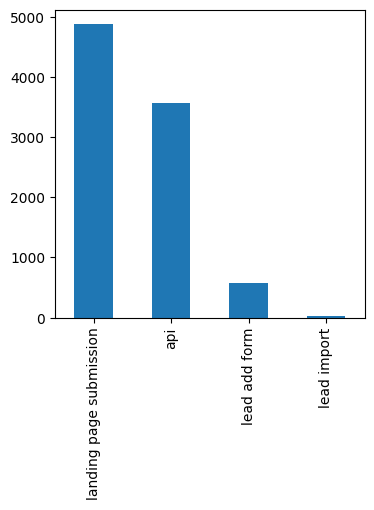

In [40]:
plt.figure(figsize = (4,4))
df['Lead Origin'].value_counts().plot.bar()
plt.show()

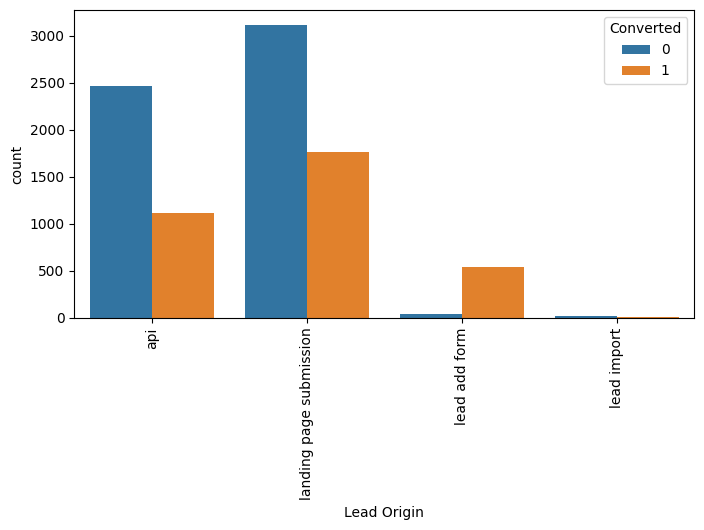

In [41]:
plt.figure(figsize=(8,4))
s1 = sns.countplot(data = df, x = 'Lead Origin', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insights:
# Majority of the Leads come from 'api' and 'landing page submission'
# Majority of the conversions also come from these two but the ratio is not very impressive
# A minority of the Lead come from 'lead add form' but the conversion rate is very impressive
# 'lead import' doesn't perform really well

# Conclusion:
# Try improving the conversion ratio in the 'api' and 'landing page submission' categories
# Take advantage of the leads coming from 'lead add form' and try to increase the numbers

Column: 'Lead Source'

In [42]:
df['Lead Source'].value_counts(normalize = True) * 100

google               31.661891
direct traffic       28.025127
olark chat           19.318933
organic search       12.717655
reference             4.882081
welingak website      1.421644
referral sites        1.377562
facebook              0.341635
bing                  0.066123
click2call            0.044082
social media          0.022041
live chat             0.022041
press_release         0.022041
pay per click ads     0.011020
blog                  0.011020
welearn               0.011020
welearnblog_home      0.011020
youtubechannel        0.011020
testone               0.011020
nc_edm                0.011020
Name: Lead Source, dtype: float64

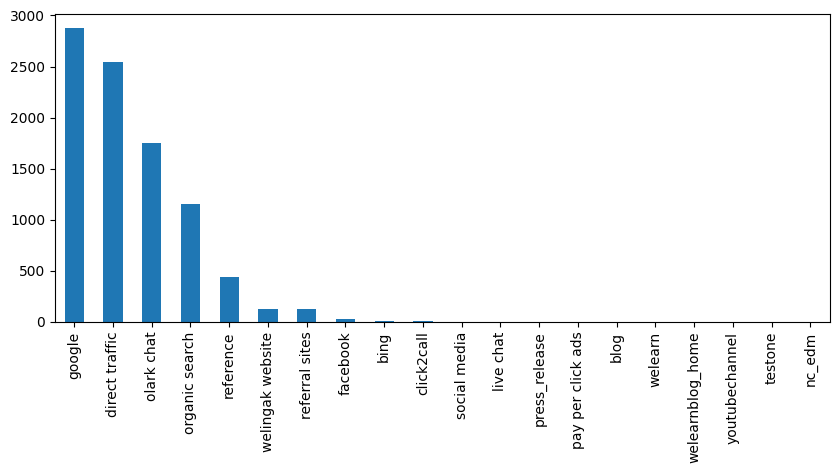

In [43]:
plt.figure(figsize = (10,4))
df['Lead Source'].value_counts().plot.bar()
plt.show()

# There are a lot of categories which have low numbers
# But they might have good conversion rates

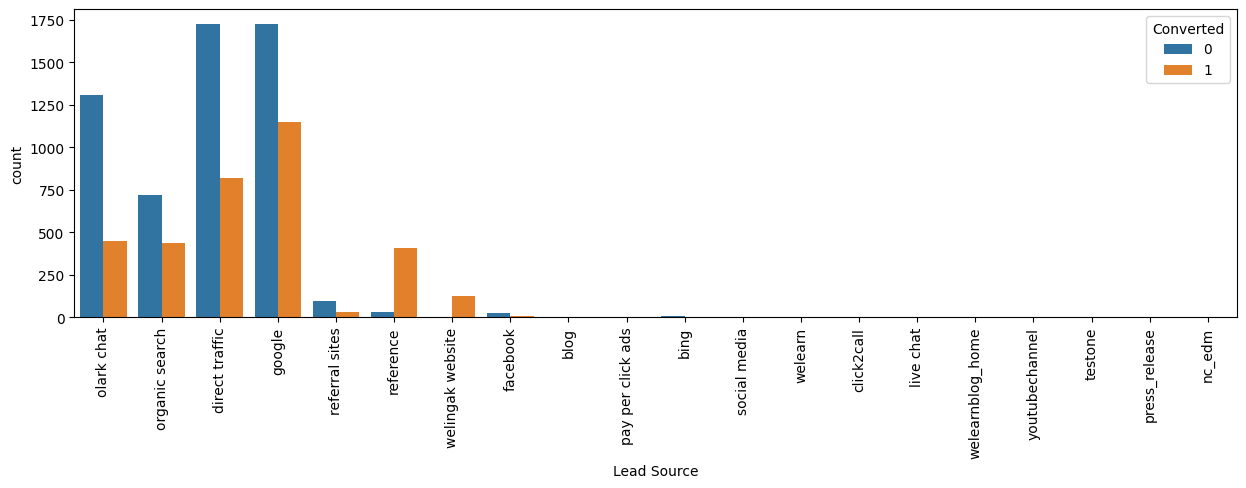

In [44]:
plt.figure(figsize=(15,4))
s1 = sns.countplot(data = df, x = 'Lead Source', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Majority of the leads come from 'olark chat', 'organic search', 'direct traffic', 'google'
# Majority of the converted leads also come from these categories due to their numbers but again, the conversion ratio is okayish
# 'referral sites' and 'facebook' perform really badly when it comes to converted leads
# On the other hand, 'reference' and 'welingak website' perform really good when it comes to conversion

# Conclusion:
# Try to improve the conversion rate if possible in the top four ('olark chat' etc) categories mentioned above
# Take advantage (i.e. get more number of leads) of the 'reference' and 'welingak website' categories, they perform remarkably well when it comes to conversion

Column: 'Do Not Email'

In [45]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
df['Do Not Email'].value_counts(normalize = True) * 100
# Over 90% of values are from one category
# This column does not have the necessary amount of variance to be conducive to our analysis and making predictions
# It would be wise to drop this column

no     92.109323
yes     7.890677
Name: Do Not Email, dtype: float64

In [47]:
df.drop('Do Not Email', axis = 1, inplace = True)

Column: 'Do Not Call'

In [48]:
df['Do Not Call'].value_counts(normalize = True) * 100
# Over 99% of values are from one category
# This column does not have the necessary amount of variance to be conducive to our analysis and making predictions
# It would be wise to drop this column

no     99.977959
yes     0.022041
Name: Do Not Call, dtype: float64

In [49]:
df.drop('Do Not Call', axis = 1, inplace = True)

Column: 'Converted'

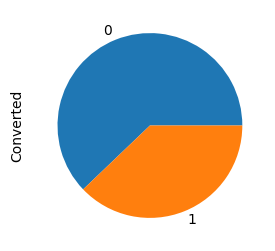

In [51]:
plt.figure(figsize = (3,3))
df.Converted.value_counts().plot.pie()
plt.show()
# This columns shows us the ratio of successfully converted leads vs unsuccessful ones
# Although it is not totally balanced, we can say that we have a pretty good number of data points from both categories

Column: 'TotalVisits'

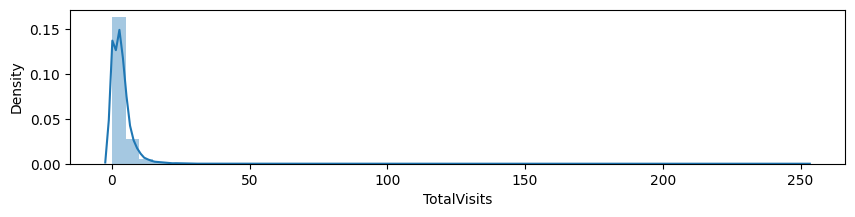

In [52]:
# TotalVisits 
plt.figure(figsize=(10, 2))
sns.distplot(df['TotalVisits'])
plt.show()
# Most of the values are in the range 0 to 20

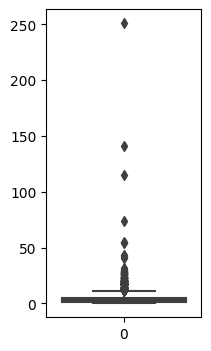

In [53]:
plt.figure(figsize = (2,4))
sns.boxplot(df['TotalVisits'])
plt.show()
# This column has a lot of outliers
# We need to remove them accordingly

In [56]:
df.TotalVisits.describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [61]:
print(df.TotalVisits.quantile(0.90))
print(df.TotalVisits.quantile(0.95))
print(df.TotalVisits.quantile(0.99))
# The maximum value is 251 while 99th percentile is 17
# Let's remove the outliers by taking the values until 99th percentile. It seems reasonable. 

7.0
10.0
17.0


In [62]:
df = df[df.TotalVisits <= df.TotalVisits.quantile(0.99)]

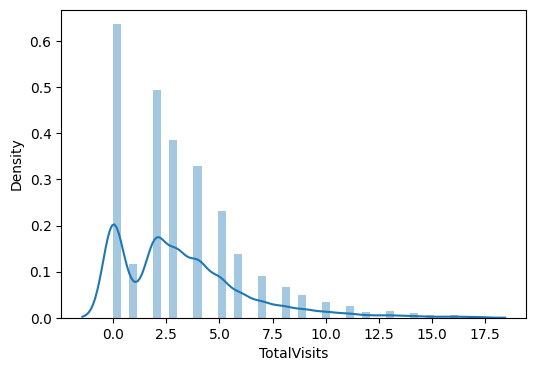

In [66]:
plt.figure(figsize=(6, 4))
sns.distplot(df['TotalVisits'])
plt.show()

In [76]:
# For not converted
df0 = df[df.Converted == 0]
# For converted
df1 = df[df.Converted == 1]

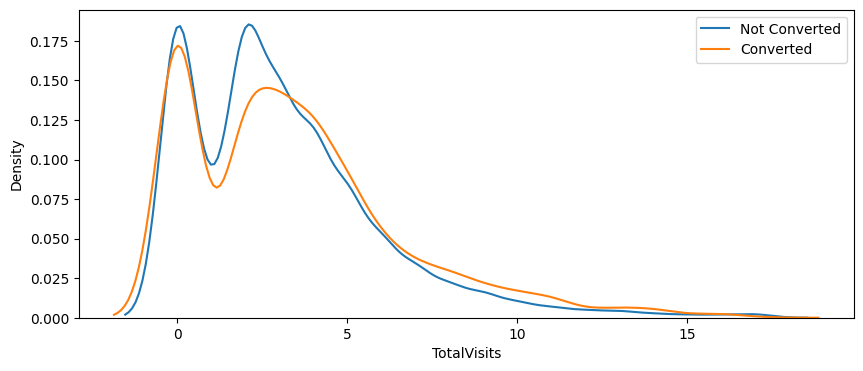

In [75]:
plt.figure(figsize=(10, 4))
sns.distplot(df0.TotalVisits,label='Not Converted',hist=False)
sns.distplot(df1.TotalVisits,label='Converted',hist=False)
plt.legend()
plt.show()

# We can definitely see a trend here
# Leads convert when TotalVisits are either low (around 0-3) and high (around 7-15)
# It basically says that there are two types of people who buy the product:
# One who visits the site a couple of times and others who visit a lot. In the middle, we have people where it TotalVisits doesn't affect the conversion rate.

Column: 'Total Time Spent on Website'

In [77]:
df['Total Time Spent on Website'].describe()

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

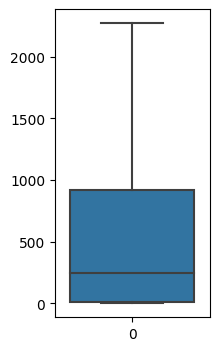

In [78]:
plt.figure(figsize = (2,4))
sns.boxplot(df['Total Time Spent on Website'])
plt.show()
# This column doesn't have an outlier problem

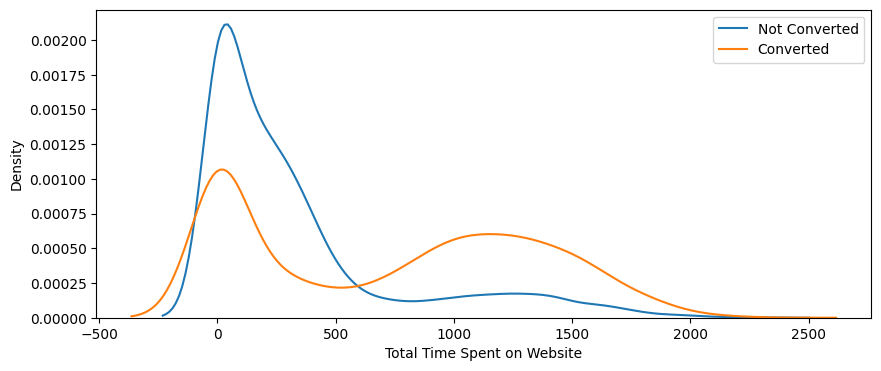

In [80]:
plt.figure(figsize=(10, 4))
sns.distplot(df0['Total Time Spent on Website'],label='Not Converted',hist=False)
sns.distplot(df1['Total Time Spent on Website'],label='Converted',hist=False)
plt.legend()
plt.show()

# There is a very clear trend here
# For values above 500 (approximately), we can see that leads do convert
# It makes sense since people who spent more time on the website were probably serious about the product

Column: 'Page Views Per Visit'

In [82]:
df['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

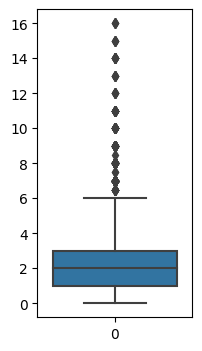

In [83]:
plt.figure(figsize = (2,4))
sns.boxplot(df['Page Views Per Visit'])
plt.show()
# This column has a couple of outliers

In [85]:
print(df['Page Views Per Visit'].quantile(0.75))
print(df['Page Views Per Visit'].quantile(0.80))
print(df['Page Views Per Visit'].quantile(0.90))
print(df['Page Views Per Visit'].quantile(0.95))
print(df['Page Views Per Visit'].quantile(0.99))

# The maximum value is 16 while the 99th percentile is 9
# 75th percentile is 3
# 80th percentile is 4
# 9 would be a reasonable value to use as a cutoff, we won't lose 99% of the values.

3.0
4.0
5.0
6.0
9.0


In [86]:
df = df[df['Page Views Per Visit'] <= 9]

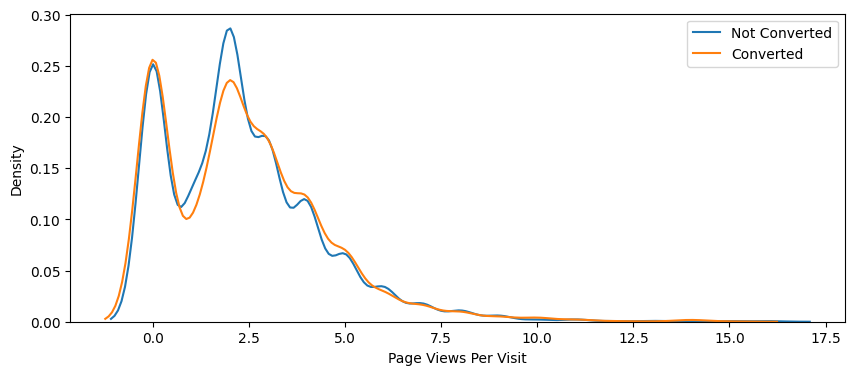

In [93]:
plt.figure(figsize=(10, 4))
sns.distplot(df0['Page Views Per Visit'],label='Not Converted',hist=False)
sns.distplot(df1['Page Views Per Visit'],label='Converted',hist=False)
plt.legend()
plt.show()

# There's a lot of overlapping here
# We can see that below 2.5, the 'not converted' are slightly more
# While above 2.5 till 5, the 'converted' is slighlty higher

Column: 'Last Activity'

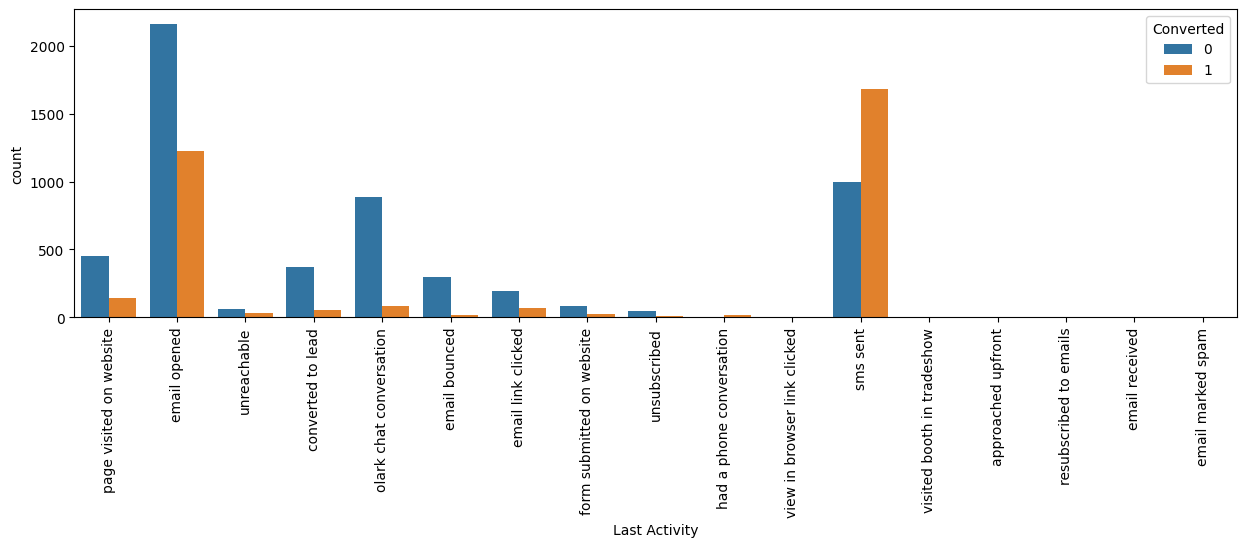

In [96]:
plt.figure(figsize=(15,4))
s1 = sns.countplot(data = df, x = 'Last Activity', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insight:
# 'email opened' and 'sms sent' have majority of the leads but contrasting conversion rates.
# 'email opened' has a negative conversion rate i.e. less leads converted
# 'sms sent' has a positive conversion rate i.e. more leads converted
# Categories like 'unreachable', 'converted to lead', ..., 'unsubscribed' have low number of leads and a negative conversion rate
# While the other categories don't even have that many leads 

# Conclusion:
# Take advantage of 'sms sent' category, it will increase the number of converted leads
# Do something about the 'email opened' category, a lot of leads come from here but don't get converted


Column: 'Specialization'

In [105]:
df['Specialization'].value_counts(normalize = True) * 100

unstated                             36.553115
finance management                   10.555805
human resource management             9.177499
marketing management                  9.121470
operations management                 5.535634
business administration               4.370238
it projects management                4.034065
supply chain management               3.787539
banking, investment and insurance     3.641865
media and advertising                 2.207530
travel and tourism                    2.117884
international business                1.916181
healthcare management                 1.680861
e-commerce                            1.199014
hospitality management                1.199014
retail management                     1.064545
rural and agribusiness                0.784402
e-business                            0.627521
services excellence                   0.425818
Name: Specialization, dtype: float64

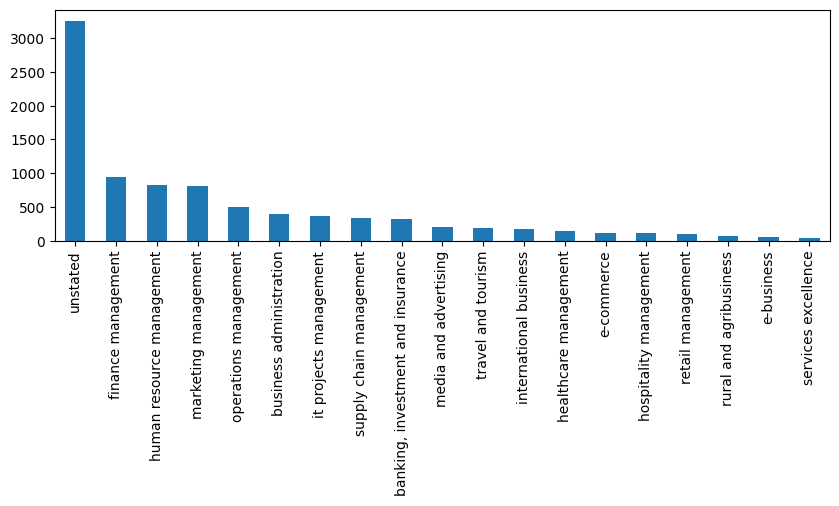

In [104]:
plt.figure(figsize = (10,3))
df['Specialization'].value_counts().plot.bar()
plt.show()

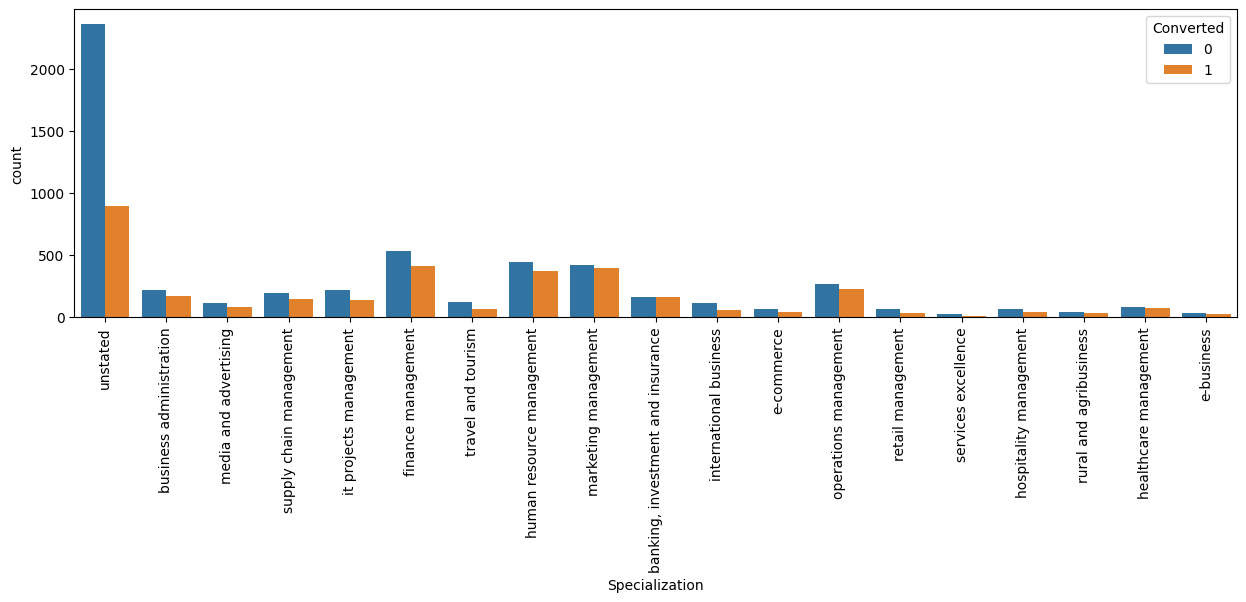

In [106]:
plt.figure(figsize=(15,4))
s1 = sns.countplot(data = df, x = 'Specialization', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insight:
# 36% of the values are in 'unstated' category. We can see that there is bad conversion ratio there
# We can see in almost none of the categories, the conversion ratio is positive
# We can however see that in other categories, the conversion ratio is atleast better than 'unstated'

# Conclusion:
# When the student fills anything but 'unstated' i.e. they know what they are doing. It shows that the lead has better chances of being converted.
# Choosing a specialization shows preparation and seriousness on the part of the student
# So in the case of any specialization but 'unstated', the conversion ratio would be better than the 'unstated' category

Column: 'What is your current occupation'

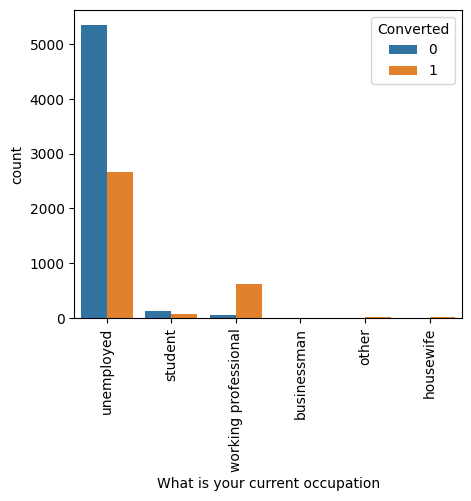

In [110]:
plt.figure(figsize=(5,4))
s1 = sns.countplot(data = df, x = 'What is your current occupation', hue = 'Converted')
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

# Insight:
# A sharp trend can be seen
# 'unemployed' gets the most number of leads but the conversion ratio is bad
# 'working professional' gets less number of lead but the conversion ratio is pretty good

# Conclusion:
# Try to convert more leads in the 'unemployed' category
# Take advantage of the 'working professional' category, the conversion ratio is remarkable

Column: 'Search', 'Magazine'

In [133]:
print('------------------------------------------')
print(df['Search'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Magazine'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Newspaper Article'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['X Education Forums'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Newspaper'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Digital Advertisement'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Through Recommendations'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Receive More Updates About Our Courses'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Update me on Supply Chain Content'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['Get updates on DM Content'].value_counts(normalize = True) * 100)
print('------------------------------------------')
print(df['I agree to pay the amount through cheque'].value_counts(normalize = True) * 100)
print('------------------------------------------')

# An overwhelming amount of values belong to one category in these columns
# Therefore, these columns don't have the necessary amount of variance to be conducive to our analysis and making predictions
# It would be wise to drop these columns

------------------------------------------
no     99.854325
yes     0.145675
Name: Search, dtype: float64
------------------------------------------
no    100.0
Name: Magazine, dtype: float64
------------------------------------------
no     99.988794
yes     0.011206
Name: Newspaper Article, dtype: float64
------------------------------------------
no    100.0
Name: X Education Forums, dtype: float64
------------------------------------------
no     99.988794
yes     0.011206
Name: Newspaper, dtype: float64
------------------------------------------
no     99.966383
yes     0.033617
Name: Digital Advertisement, dtype: float64
------------------------------------------
no     99.932766
yes     0.067234
Name: Through Recommendations, dtype: float64
------------------------------------------
no    100.0
Name: Receive More Updates About Our Courses, dtype: float64
------------------------------------------
no    100.0
Name: Update me on Supply Chain Content, dtype: float64
---------------

In [135]:
useless_columns = [
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
    'Get updates on DM Content', 'I agree to pay the amount through cheque'
]

df.drop(useless_columns, axis = 1, inplace = True)

In [137]:
list(df.columns)

['Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Column: 'A free copy of Mastering The Interview'

In [ ]:
WE ARE HERE!!!

Column: 'Last Notable Activity'

In [122]:
df['A free copy of Mastering The Interview'].value_counts(normalize = True) * 100

no     68.744589
yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [123]:
df['Last Notable Activity'].value_counts(normalize = True) * 100

modified                        36.872294
email opened                    30.595238
sms sent                        23.506494
page visited on website          3.441558
olark chat conversation          1.980519
email link clicked               1.872294
email bounced                    0.649351
unsubscribed                     0.508658
unreachable                      0.346320
had a phone conversation         0.151515
email marked spam                0.021645
approached upfront               0.010823
resubscribed to emails           0.010823
view in browser link clicked     0.010823
form submitted on website        0.010823
email received                   0.010823
Name: Last Notable Activity, dtype: float64

In [ ]:
# Country

plt.figure(figsize=(8, 4))
(df.Country.value_counts(normalize = True, dropna = False) * 100).plot.bar() 
plt.show()